<a href="https://colab.research.google.com/github/Sagar-modelling/OpenCV-East.ipynb/blob/main/OpenCV_East_handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

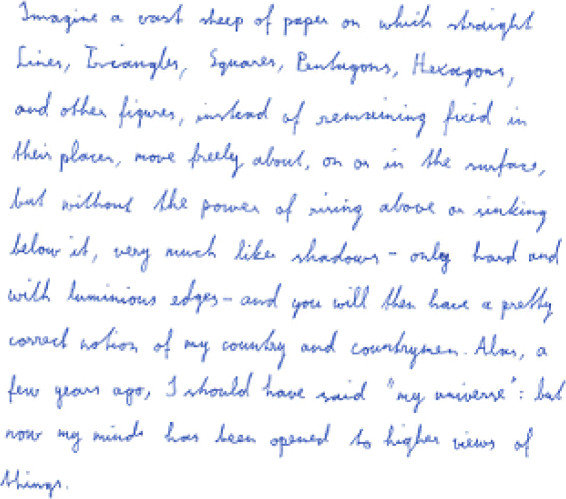

In [30]:
img = cv2.imread('/content/Sample-handwritten-text-from-CVL-Database_W640.jpg',cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
!tar -xzvf "/content/gdrive/MyDrive/frozen_east_text_detection.tar.gz"

frozen_east_text_detection.pb


In [33]:
# Download the EAST model and Load it
model = cv2.dnn.readNet('/content/frozen_east_text_detection.pb')
model

<dnn_Net 0x7f27af5fdd10>

In [34]:
# ## Prepare the image
# use multiple of 32 to set the new img shape
height, width, _ = img.shape
new_height = (height//32)*32
new_width = (width//32)*32
print(new_height, new_width)

480 544


In [35]:
# get the ratio change in width and height
h_ratio = height/new_height
w_ratio = width/new_width
print(h_ratio, w_ratio)

1.0395833333333333 1.0404411764705883


In [36]:
blob = cv2.dnn.blobFromImage(img, 1, (new_width, new_height),(123.68, 116.78, 103.94), True, False)

In [37]:
# ## Pass the image to network and extract score and geometry map
model.setInput(blob)

In [38]:
model.getUnconnectedOutLayersNames() #get names of output layers that calculate geometry maps(concat_3) and scores(Conv_7) respectively.

['feature_fusion/concat_3', 'feature_fusion/Conv_7/Sigmoid']

In [39]:
(geometry, scores) = model.forward(model.getUnconnectedOutLayersNames())

In [40]:
(geometry).shape

(1, 5, 120, 136)

In [41]:
(scores).shape

(1, 1, 120, 136)

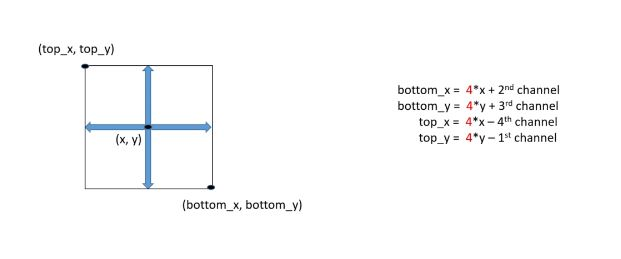

In [ ]:
img_src = cv2.imread('/content/Capture.JPG',cv2.IMREAD_UNCHANGED)
cv2_imshow(img_src)

In [42]:
# ## Post-Processing
rectangles = [] #list 1
confidence_score = [] #list 2
for i in range(geometry.shape[2]): #iterate each pixel row by row to construct counding boxes. shape[2] pixel value = 96
    for j in range(0, geometry.shape[3]):  #shape[3] pixel value =160
        
        if scores[0][0][i][j] < 0.1:  #if score of pixel is less than threshold then we don't consider the pixel and we continue
            continue
            #otherwise obtain bounding box coordinates as follows
        bottom_x = int(j*4 + geometry[0][1][i][j])
        bottom_y = int(i*4 + geometry[0][2][i][j])
        

        top_x = int(j*4 - geometry[0][3][i][j])
        top_y = int(i*4 - geometry[0][0][i][j])
        
        rectangles.append((top_x, top_y, bottom_x, bottom_y))
        confidence_score.append(float(scores[0][0][i][j]))

In [43]:
from imutils.object_detection import non_max_suppression

In [44]:
# use Non-max suppression to get the required rectangles
import numpy as np
fin_boxes = non_max_suppression(np.array(rectangles), probs=confidence_score, overlapThresh=0.5) #this NMS function only works for non roated text boxes.
fin_boxes

array([[160, 358, 241, 382],
       [368, 184, 420, 206],
       [ 53, 366,  98, 384],
       [241, 140, 298, 163],
       [425,   8, 516,  33],
       [417, 370, 486, 386],
       [  8, 364,  40, 384],
       [175, 131, 238, 164],
       [ 29, 230,  58, 247],
       [  8, 315,  67, 336],
       [  5, 411,  43, 426],
       [  5, 268,  50, 290],
       [248, 406, 319, 436],
       [269,  11, 317,  28],
       [189,   7, 236,  30],
       [436, 417, 476, 434],
       [148, 179, 182, 204],
       [378, 326, 418, 344],
       [200,  46, 275,  75],
       [ 55, 182, 131, 205],
       [337, 325, 383, 343],
       [482, 276, 537, 312],
       [ 70,  42, 180,  75],
       [319, 276, 357, 299],
       [159, 403, 191, 426],
       [445, 147, 536, 170],
       [303, 101, 417, 121],
       [281,  46, 390,  72],
       [309, 148, 331, 163],
       [ 15,  42,  68,  68],
       [192, 186, 253, 210],
       [153, 226, 210, 252],
       [ 17,   3,  97,  25],
       [ 59, 132, 125, 165],
       [281, 2

In [45]:
#display text boxes and converting to original shape
img_copy = img.copy()
for (x1, y1, x2, y2) in fin_boxes:

    x1 = int(x1 * w_ratio)
    y1 = int(y1 * h_ratio)
    x2 = int(x2 * w_ratio)
    y2 = int(y2 * h_ratio)

    cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0,255,0) , 2) #to draw rectangles on the image

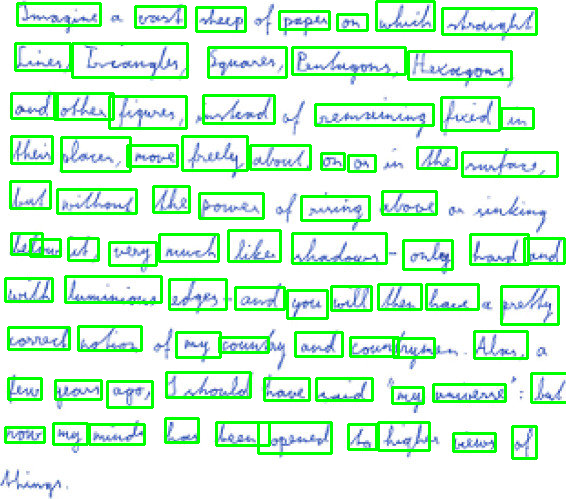

In [46]:
cv2_imshow(img_copy)